In [1]:
# Import Neccessary libraries
import numpy as np 
import pandas as pd 

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('/home/mainuser/Grebeneva_IIS/data/ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [7]:
#removing unneccessary columns
df.drop(['Unnamed: 0','salary','salary_currency'],axis=1,inplace=True)

In [8]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [9]:
# Check Duplicates
duplicates = df.duplicated()

if duplicates.any():
    print("Dupl_found")
    duplicate_rows = df[duplicates]
    print(duplicate_rows)
else:
    print("Dupl_not_found")

Dupl_found
     work_year experience_level employment_type                  job_title  \
217       2021               MI              FT             Data Scientist   
256       2021               MI              FT              Data Engineer   
331       2022               SE              FT               Data Analyst   
332       2022               SE              FT               Data Analyst   
333       2022               SE              FT               Data Analyst   
353       2022               SE              FT             Data Scientist   
362       2022               SE              FT               Data Analyst   
363       2022               SE              FT               Data Analyst   
370       2022               SE              FT             Data Scientist   
374       2022               MI              FT              ETL Developer   
377       2022               SE              FT              Data Engineer   
385       2022               SE              FT      

In [18]:
## Information about dataset
print('SIZE = ',df.size)
print('')
print('describe')
print(df.describe())
print('')
print('unique values')
print(df.nunique())
print('')
print('null values')
print(df.isnull().sum())

SIZE =  5463

describe
         work_year  salary_in_usd  remote_ratio
count   607.000000     607.000000     607.00000
mean   2021.405272  112297.869852      70.92257
std       0.692133   70957.259411      40.70913
min    2020.000000    2859.000000       0.00000
25%    2021.000000   62726.000000      50.00000
50%    2022.000000  101570.000000     100.00000
75%    2022.000000  150000.000000     100.00000
max    2022.000000  600000.000000     100.00000

unique values
work_year               3
experience_level        4
employment_type         4
job_title              50
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

null values
work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [20]:
df['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [21]:
df['experience_level']=df['experience_level'].replace('SE','Senior level')
df['experience_level']=df['experience_level'].replace('MI','Intermediate level')
df['experience_level']=df['experience_level'].replace('EN','Entry level')
df['experience_level']=df['experience_level'].replace('EX','Executive level')

In [22]:
df['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [23]:
df['employment_type']=df['employment_type'].replace('FT','Full Time')
df['employment_type']=df['employment_type'].replace('CT','Contract')
df['employment_type']=df['employment_type'].replace('FL','Freelance')
df['employment_type']=df['employment_type'].replace('PT','Part Time')

In [24]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Intermediate level,Full Time,Data Scientist,79833,DE,0,DE,L
1,2020,Senior level,Full Time,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,Senior level,Full Time,Big Data Engineer,109024,GB,50,GB,M
3,2020,Intermediate level,Full Time,Product Data Analyst,20000,HN,0,HN,S
4,2020,Senior level,Full Time,Machine Learning Engineer,150000,US,50,US,L


In [25]:
jobs=df['job_title'].value_counts()
jobs

job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Machine Learning Scientist                    8
Big Data Engineer                             8
Director of Data Science                      7
AI Scientist                                  7
Principal Data Scientist                      7
Data Science Consultant                       7
Data Analytics Manager                        7
BI Data Analyst                               6
Computer Vision Engineer                      6
ML Engineer                                   6
Lead Data Engineer                            6
Applied Data Scientist                        5
Business Data Analyst                         5
Data Engineering Manager      

In [56]:
## Top 7 job because > 10 people 

top7_jobs=jobs[:7]
top7_jobs

job_title
Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Data Science Manager          12
Data Architect                11
Name: count, dtype: int64

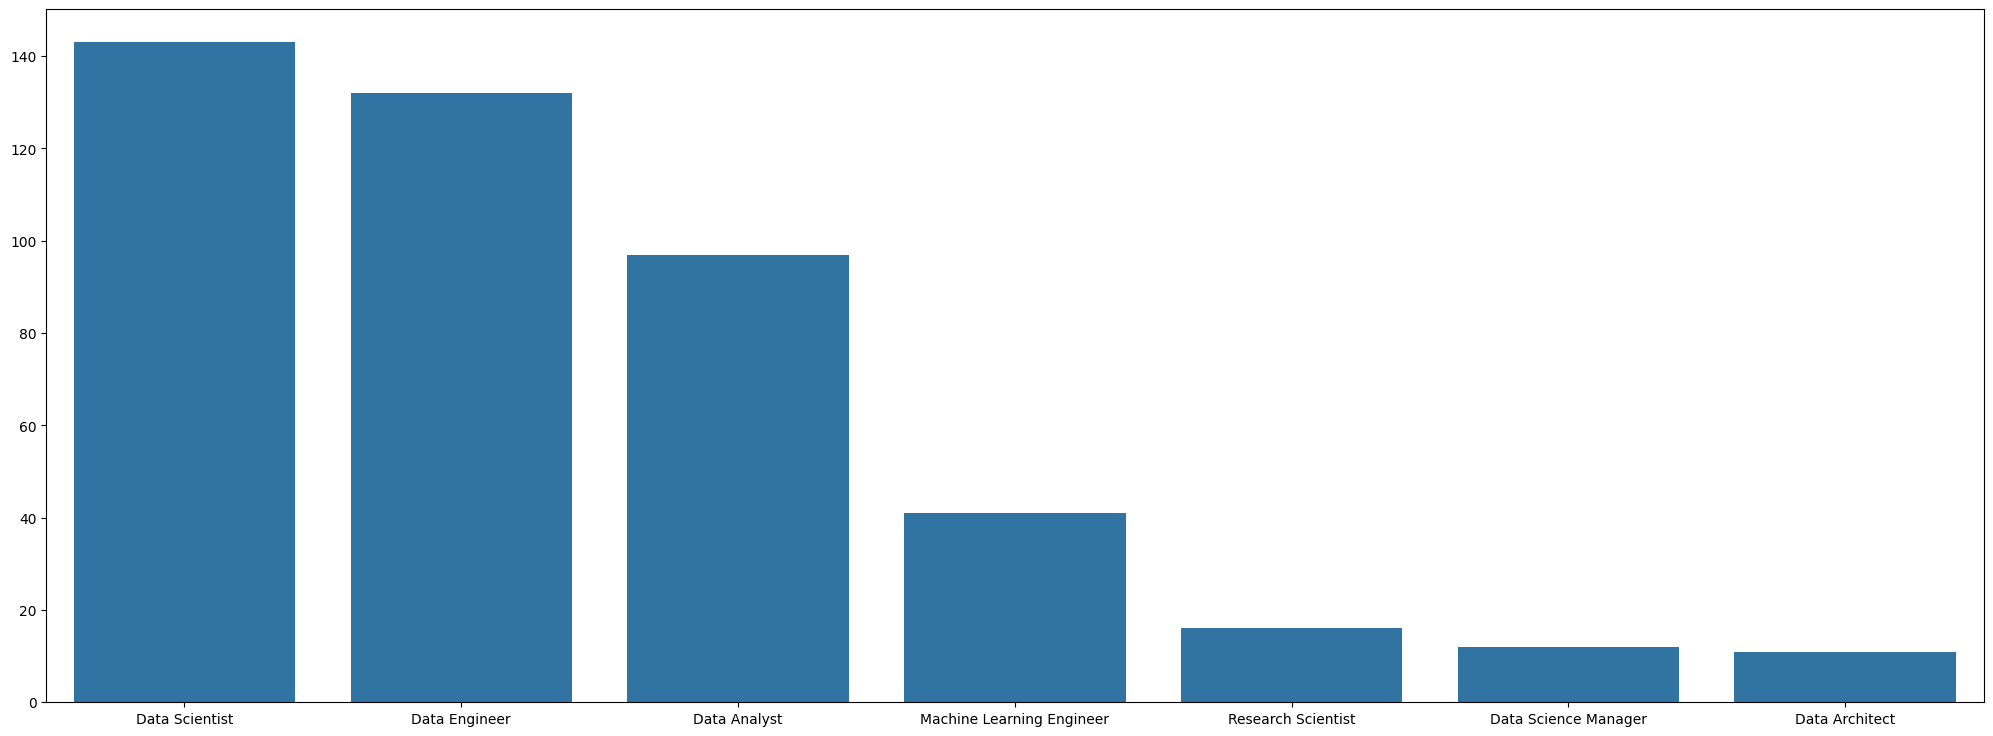

In [58]:
#graf jobs po kolvo people
job_title=['Data Scientist','Data Engineer', 'Data Analyst','Machine Learning Engineer', 'Research Scientist','Data Science Manager','Data Architect']
counts=np.array(top7_jobs)
plt.figure(figsize=(25,9))
sns.barplot(x=job_title,y=counts)
plt.show()

This Graph gives us insight that most people are having Data Scientist Job Role 

In [44]:
## new dataset with 7 

df_filtr_1 = df[df['job_title'].isin(job_title)]

jobs=df_filtr_1['job_title'].value_counts()

jobs


job_title
Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Data Science Manager          12
Data Architect                11
Name: count, dtype: int64

In [48]:
## Information about new dataset 
print('SIZE_new_bd = ',df_filtr_1.size)
print('SIZE_old_bd = ',df.size)

SIZE_new_bd =  4068
SIZE_old_bd =  5463


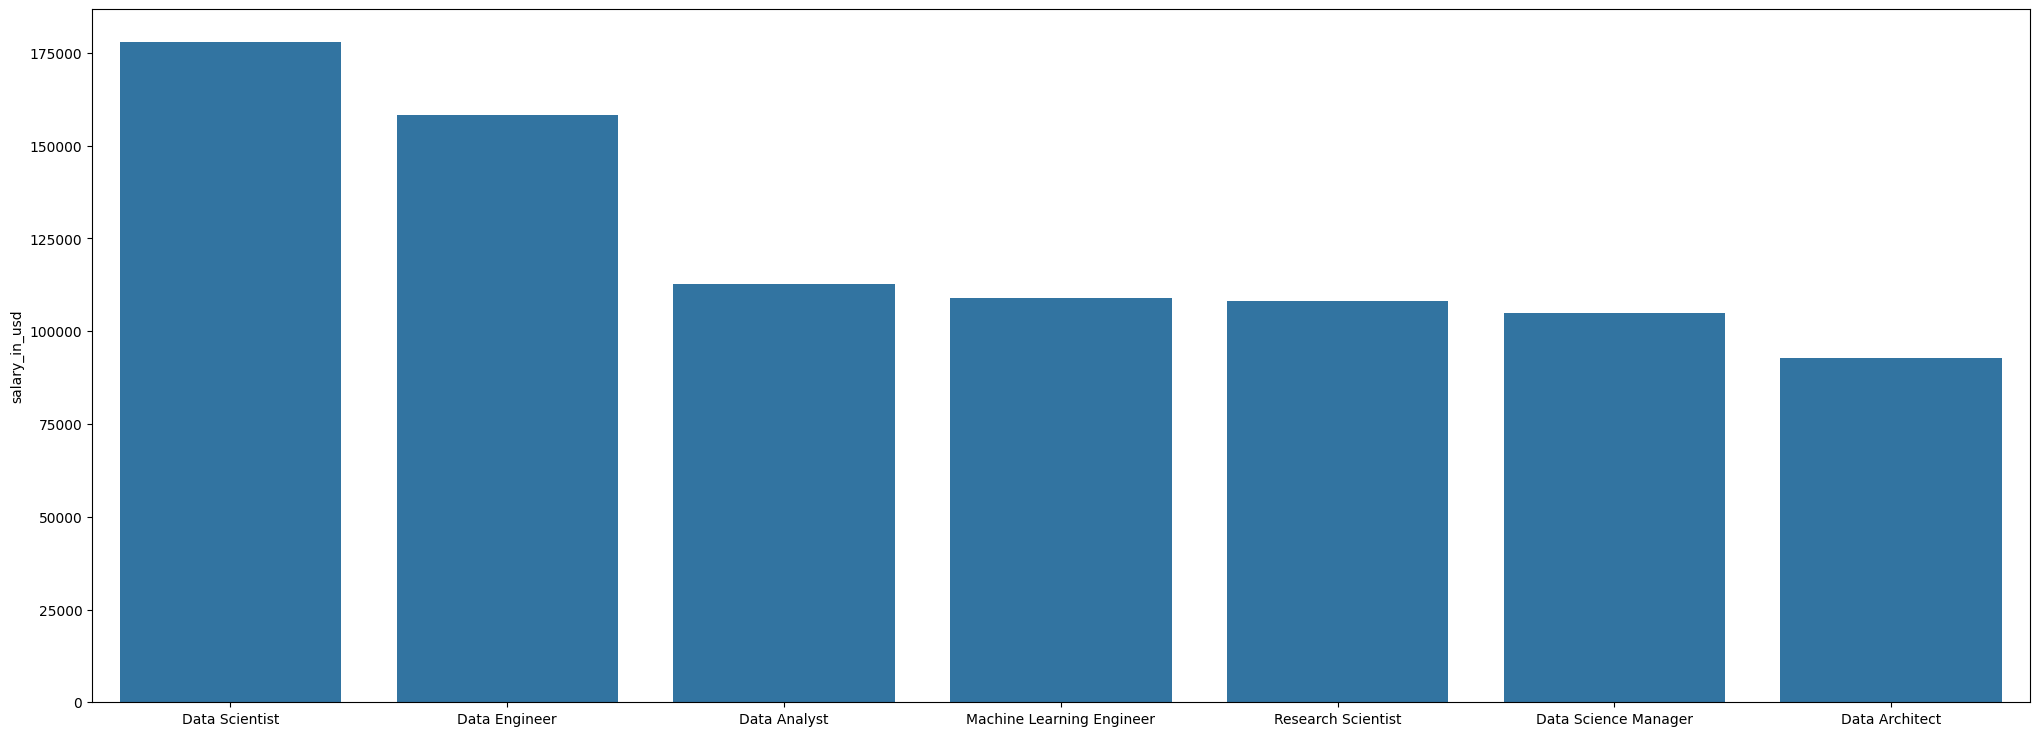

In [49]:
#graf jobs po sredney zp

job_title=['Data Scientist','Data Engineer', 'Data Analyst','Machine Learning Engineer', 'Research Scientist','Data Science Manager','Data Architect']
avg_slary=df_filtr_1.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
plt.figure(figsize=(25,9))
sns.barplot(x=job_title,y=avg_slary)
plt.show()

In [67]:
#filtr po level

level_title=['Senior level','Intermediate level', 'Entry level']
df_filtr_2 = df_filtr_1[df_filtr_1['experience_level'].isin(level_title)]
levels=df_filtr_2['experience_level'].value_counts()
levels



print('old SIZE = ',df.size)
print('filter1 SIZE = ',df_filtr_1.size)
print('new SIZE = ',df_filtr_2.size)


old SIZE =  5463
filter1 SIZE =  4068
new SIZE =  4014


In [65]:
## info about Experiance level

experience_level=df_filtr_2['experience_level'].value_counts()
experience_level

experience_level
Senior level          221
Intermediate level    166
Entry level            59
Name: count, dtype: int64

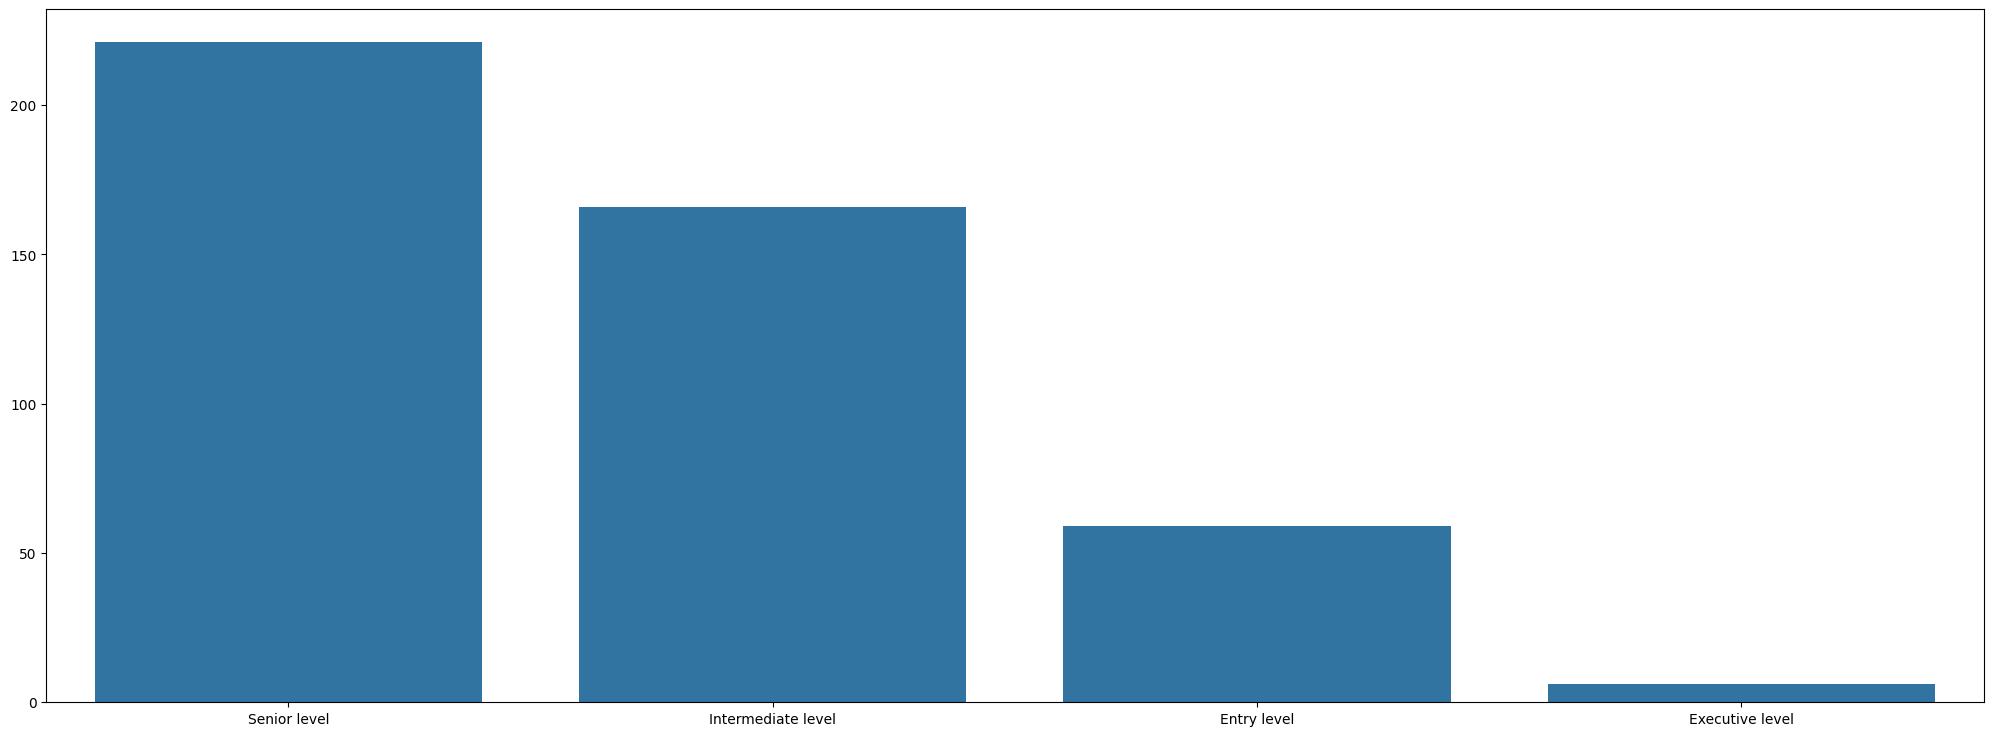

In [62]:
#graf jobs po greidu 

level_title=['Senior level','Intermediate level', 'Entry level','Executive level']
level_counts=np.array(experience_level)
plt.figure(figsize=(25,9))
sns.barplot(x=level_title,y=level_counts)
plt.show()

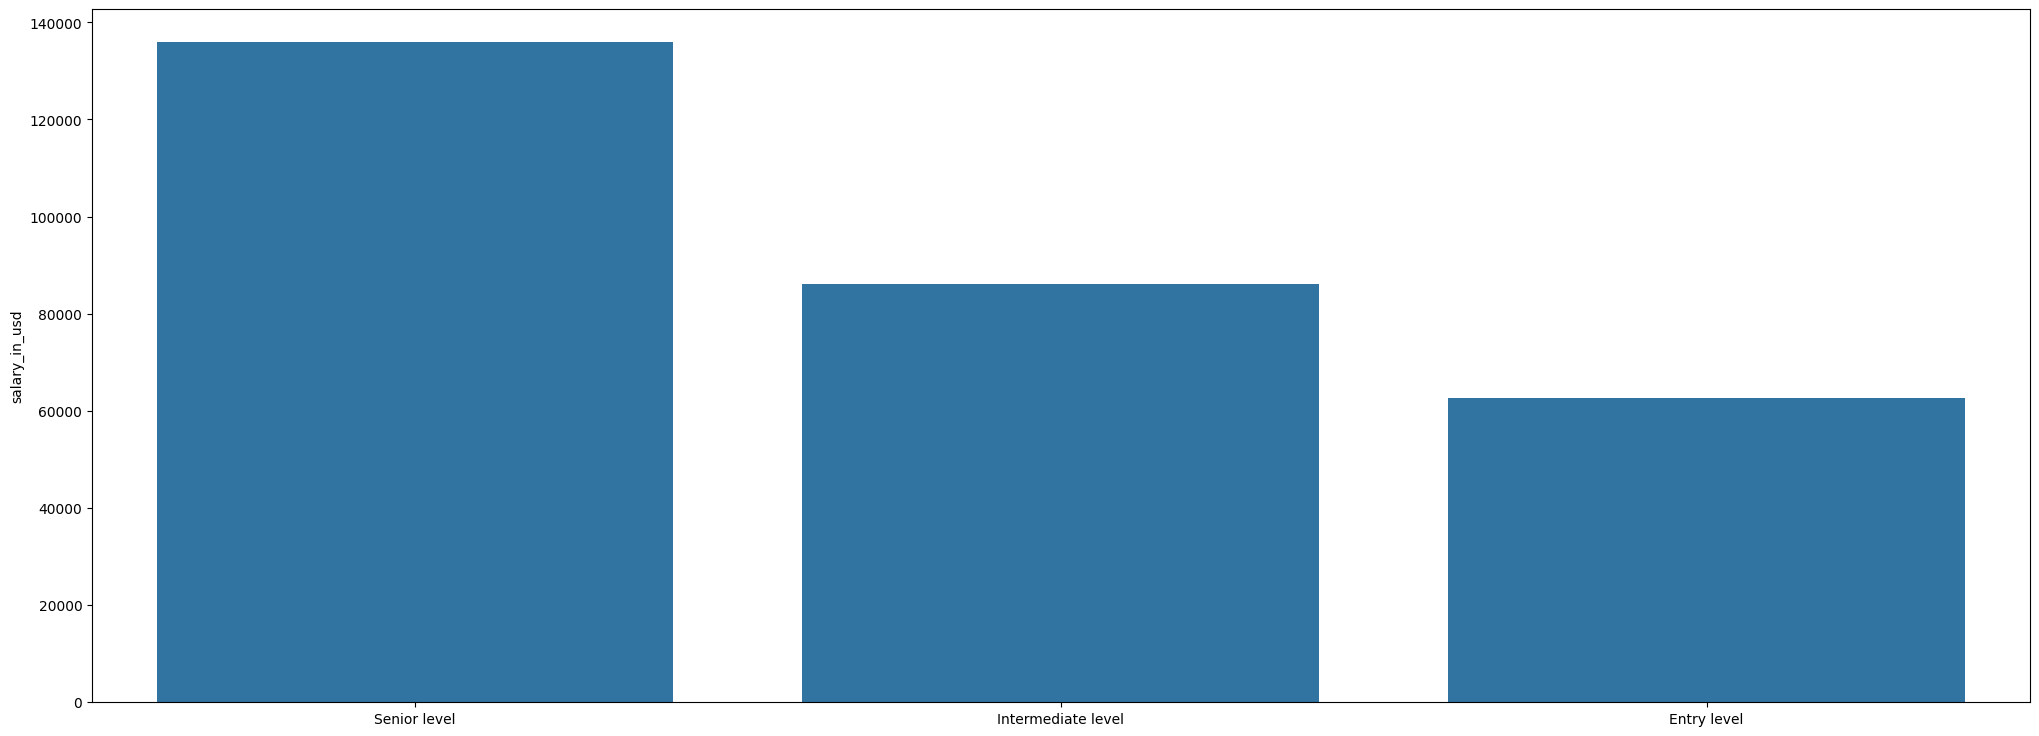

In [66]:
## Top 3 level 

avg_slary=df_filtr_2.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False)
plt.figure(figsize=(25,9))
sns.barplot(x=level_title,y=avg_slary)
plt.show()